In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Cleaning Data
df['job_posted_date']  = pd.to_datetime(df['job_posted_date'])

In [4]:
country_pivot_table = df.pivot_table(
    values='salary_year_avg',
    columns='job_title_short',
    index='job_country',
    aggfunc='median'
)

In [15]:
top_countries = df['job_country'].value_counts().head(6).index



In [ ]:
 
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

country_pivot_table = country_pivot_table[job_titles]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain')])

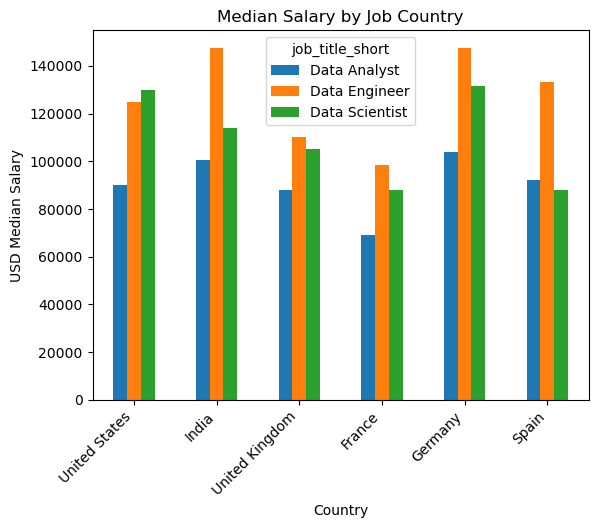

In [23]:
country_pivot_table.plot(kind='bar')
plt.ylabel('USD Median Salary')
plt.xlabel('Country')
plt.title('Median Salary by Job Country')
plt.xticks(ha='right', rotation= 45)

In [ ]:
#Counting Job Postings by Title and Country using the GroupBy method
job_counts = df.groupby(['job_title_short', 'job_country']).size().reset_index(name='count')
job_counts

,job_title_short,job_country,count
0,Business Analyst,Afghanistan,4
1,Business Analyst,Albania,11
2,Business Analyst,Algeria,21
3,Business Analyst,Angola,1
4,Business Analyst,Argentina,453
...,...,...,...
1382,Software Engineer,Venezuela,6
1383,Software Engineer,Vietnam,279
1384,Software Engineer,Yemen,1
1385,Software Engineer,Zambia,3


In [ ]:
#Counting Job Postings by Title and Country using a Pivot Table

j_counts_pivot = df.pivot_table(index=['job_title_short', 'job_country'], aggfunc='size')

j_counts_pivot

job_title_short    job_country
Business Analyst   Afghanistan      4
                   Albania         11
                   Algeria         21
                   Angola           1
                   Argentina      453
                                 ... 
Software Engineer  Venezuela        6
                   Vietnam        279
                   Yemen            1
                   Zambia           3
                   Zimbabwe         8
Length: 1387, dtype: int64

In [25]:
salary_by_job = df.pivot_table(
    values='salary_year_avg',
    index='job_title_short',
    aggfunc=['min', 'median', 'max']
)
salary_by_job

,min,median,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,16500.0,85000.0,387460.0
Cloud Engineer,42000.0,90000.0,280000.0
Data Analyst,25000.0,90000.0,650000.0
Data Engineer,15000.0,125000.0,525000.0
Data Scientist,27000.0,127500.0,960000.0
Machine Learning Engineer,30000.0,106415.0,325000.0
Senior Data Analyst,30000.0,111175.0,425000.0
Senior Data Engineer,35000.0,147500.0,425000.0


Text(0.5, 1.0, 'Salary Averages by Job Title')

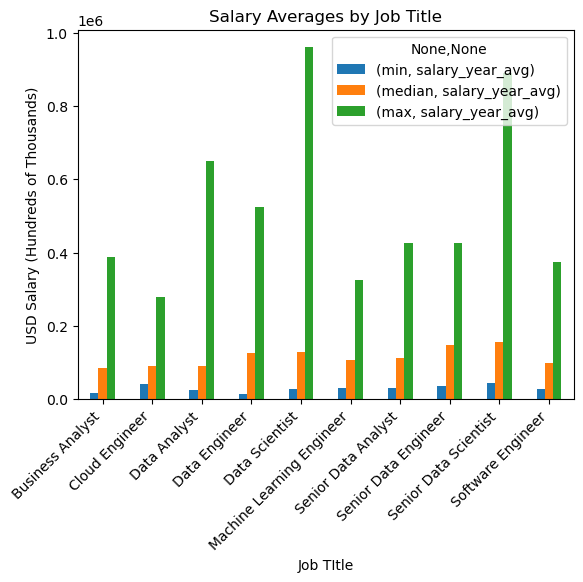

In [29]:
salary_by_job.plot(kind='bar')
plt.xticks(ha='right', rotation=45)
plt.ylabel('USD Salary (Hundreds of Thousands)')
plt.xlabel('Job TItle')
plt.title('Salary Averages by Job Title')

In [44]:
salary_sum_by_country = df.pivot_table(
    values='salary_year_avg',
    index = ['job_country', 'job_title_short'],
    aggfunc='sum'
)
# Sorting the new aggrigated table by highest to lowest salary
salary_sum_by_country = salary_sum_by_country.sort_values(by='salary_year_avg', ascending=False)

salary_sum_by_country.head(6)

salary_year_avg
job_country   job_title_short                       
United States Data Scientist            6.371774e+08
              Data Analyst              4.113097e+08
              Data Engineer             3.912708e+08
              Senior Data Scientist     1.977291e+08
              Senior Data Engineer      1.602320e+08
              Senior Data Analyst       1.056607e+08

In [45]:
# Renaming the PTable column to reflect new aggfunction
salary_sum_by_country = salary_sum_by_country.rename(columns={'salary_year_avg': 'total salary'})

salary_sum_by_country

total salary
job_country   job_title_short                    
United States Data Scientist         6.371774e+08
              Data Analyst           4.113097e+08
              Data Engineer          3.912708e+08
              Senior Data Scientist  1.977291e+08
              Senior Data Engineer   1.602320e+08
...                                           ...
Jordan        Software Engineer      0.000000e+00
Kazakhstan    Business Analyst       0.000000e+00
              Data Engineer          0.000000e+00
              Data Scientist         0.000000e+00
Zimbabwe      Software Engineer      0.000000e+00

[1387 rows x 1 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Business Analyst'),
  Text(1, 0, 'Cloud Engineer'),
  Text(2, 0, 'Data Analyst'),
  Text(3, 0, 'Data Engineer'),
  Text(4, 0, 'Data Scientist'),
  Text(5, 0, 'Machine Learning Engineer'),
  Text(6, 0, 'Senior Data Analyst'),
  Text(7, 0, 'Senior Data Engineer'),
  Text(8, 0, 'Senior Data Scientist'),
  Text(9, 0, 'Software Engineer')])

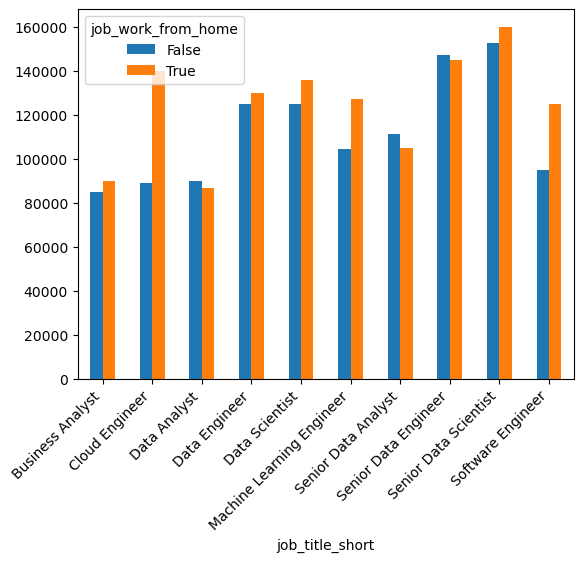

In [69]:
date_job_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_title_short',
    columns='job_work_from_home',
    aggfunc='median'
)

date_job_salary.plot(kind='bar')
plt.xticks(ha='right', rotation=45)